In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
from sklearn.preprocessing import StandardScaler

In [2]:
dat = pd.read_csv('brain_stroke.csv')

In [4]:
dat

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [3]:
dat.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [3]:
dat['hypertension'] = dat['hypertension'].astype('category')
dat['heart_disease'] = dat['heart_disease'].astype('category')
dat['stroke'] = dat['stroke'].astype('category')
dat['ever_married'] = dat['ever_married'].astype('category')
dat['work_type'] = dat['work_type'].astype('category')
dat['Residence_type'] = dat['Residence_type'].astype('category')
dat['smoking_status'] = dat['smoking_status'].astype('category')

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline


In practice, a common strategy is to use RandomizedSearchCV for a broader, faster initial search and then refine the results using GridSearchCV around the best values found by the randomized search.

For the categorical variables, you have to one hot encode.


In [5]:
X = dat[['gender','age'	,'hypertension',	'heart_disease'	,'ever_married'	,'work_type',	'Residence_type'	,'avg_glucose_level',	'bmi'	,'smoking_status']] 
y = dat[['stroke']]

In [6]:
# List of columns to one-hot encode
columns_to_encode = ['work_type', 'Residence_type', 'smoking_status', 'gender']

# Convert binary categorical columns to 0/1 format 
binary_columns = ['hypertension', 'heart_disease', 'ever_married']

for col in binary_columns:
    if X[col].dtype.name == 'object' or X[col].dtype.name == 'category':
        unique_vals = X[col].cat.categories.tolist() if X[col].dtype.name == 'category' else X[col].unique()
        X.loc[:, col] = X[col].replace({unique_vals[0]: 0, unique_vals[1]: 1})

# One-hot encode the specified columns
X_encoded = pd.get_dummies(X[columns_to_encode])

# Drop the original categorical columns from X
X = X.drop(columns=columns_to_encode)

# Concatenate the original numerical columns with the encoded columns
X_final = pd.concat([X, X_encoded], axis=1)

y = y.values.ravel()

In [7]:
X_final

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male
0,67.0,0,1,1,228.69,36.6,False,True,False,False,False,True,False,True,False,False,False,True
1,80.0,0,1,1,105.92,32.5,False,True,False,False,True,False,False,False,True,False,False,True
2,49.0,0,0,1,171.23,34.4,False,True,False,False,False,True,False,False,False,True,True,False
3,79.0,1,0,1,174.12,24.0,False,False,True,False,True,False,False,False,True,False,True,False
4,81.0,0,0,1,186.21,29.0,False,True,False,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,41.0,0,0,0,70.15,29.8,False,True,False,False,True,False,False,True,False,False,False,True
4977,40.0,0,0,1,191.15,31.1,False,True,False,False,False,True,False,False,False,True,False,True
4978,45.0,1,0,1,95.02,31.8,True,False,False,False,True,False,False,False,False,True,True,False
4979,40.0,0,0,1,83.94,30.0,False,True,False,False,True,False,False,False,False,True,False,True


In [8]:
# Dropping reference categories
X_final = X_final.drop(columns=['work_type_Govt_job', 'Residence_type_Rural', 'smoking_status_Unknown', 'gender_Female'])


Logistic regression


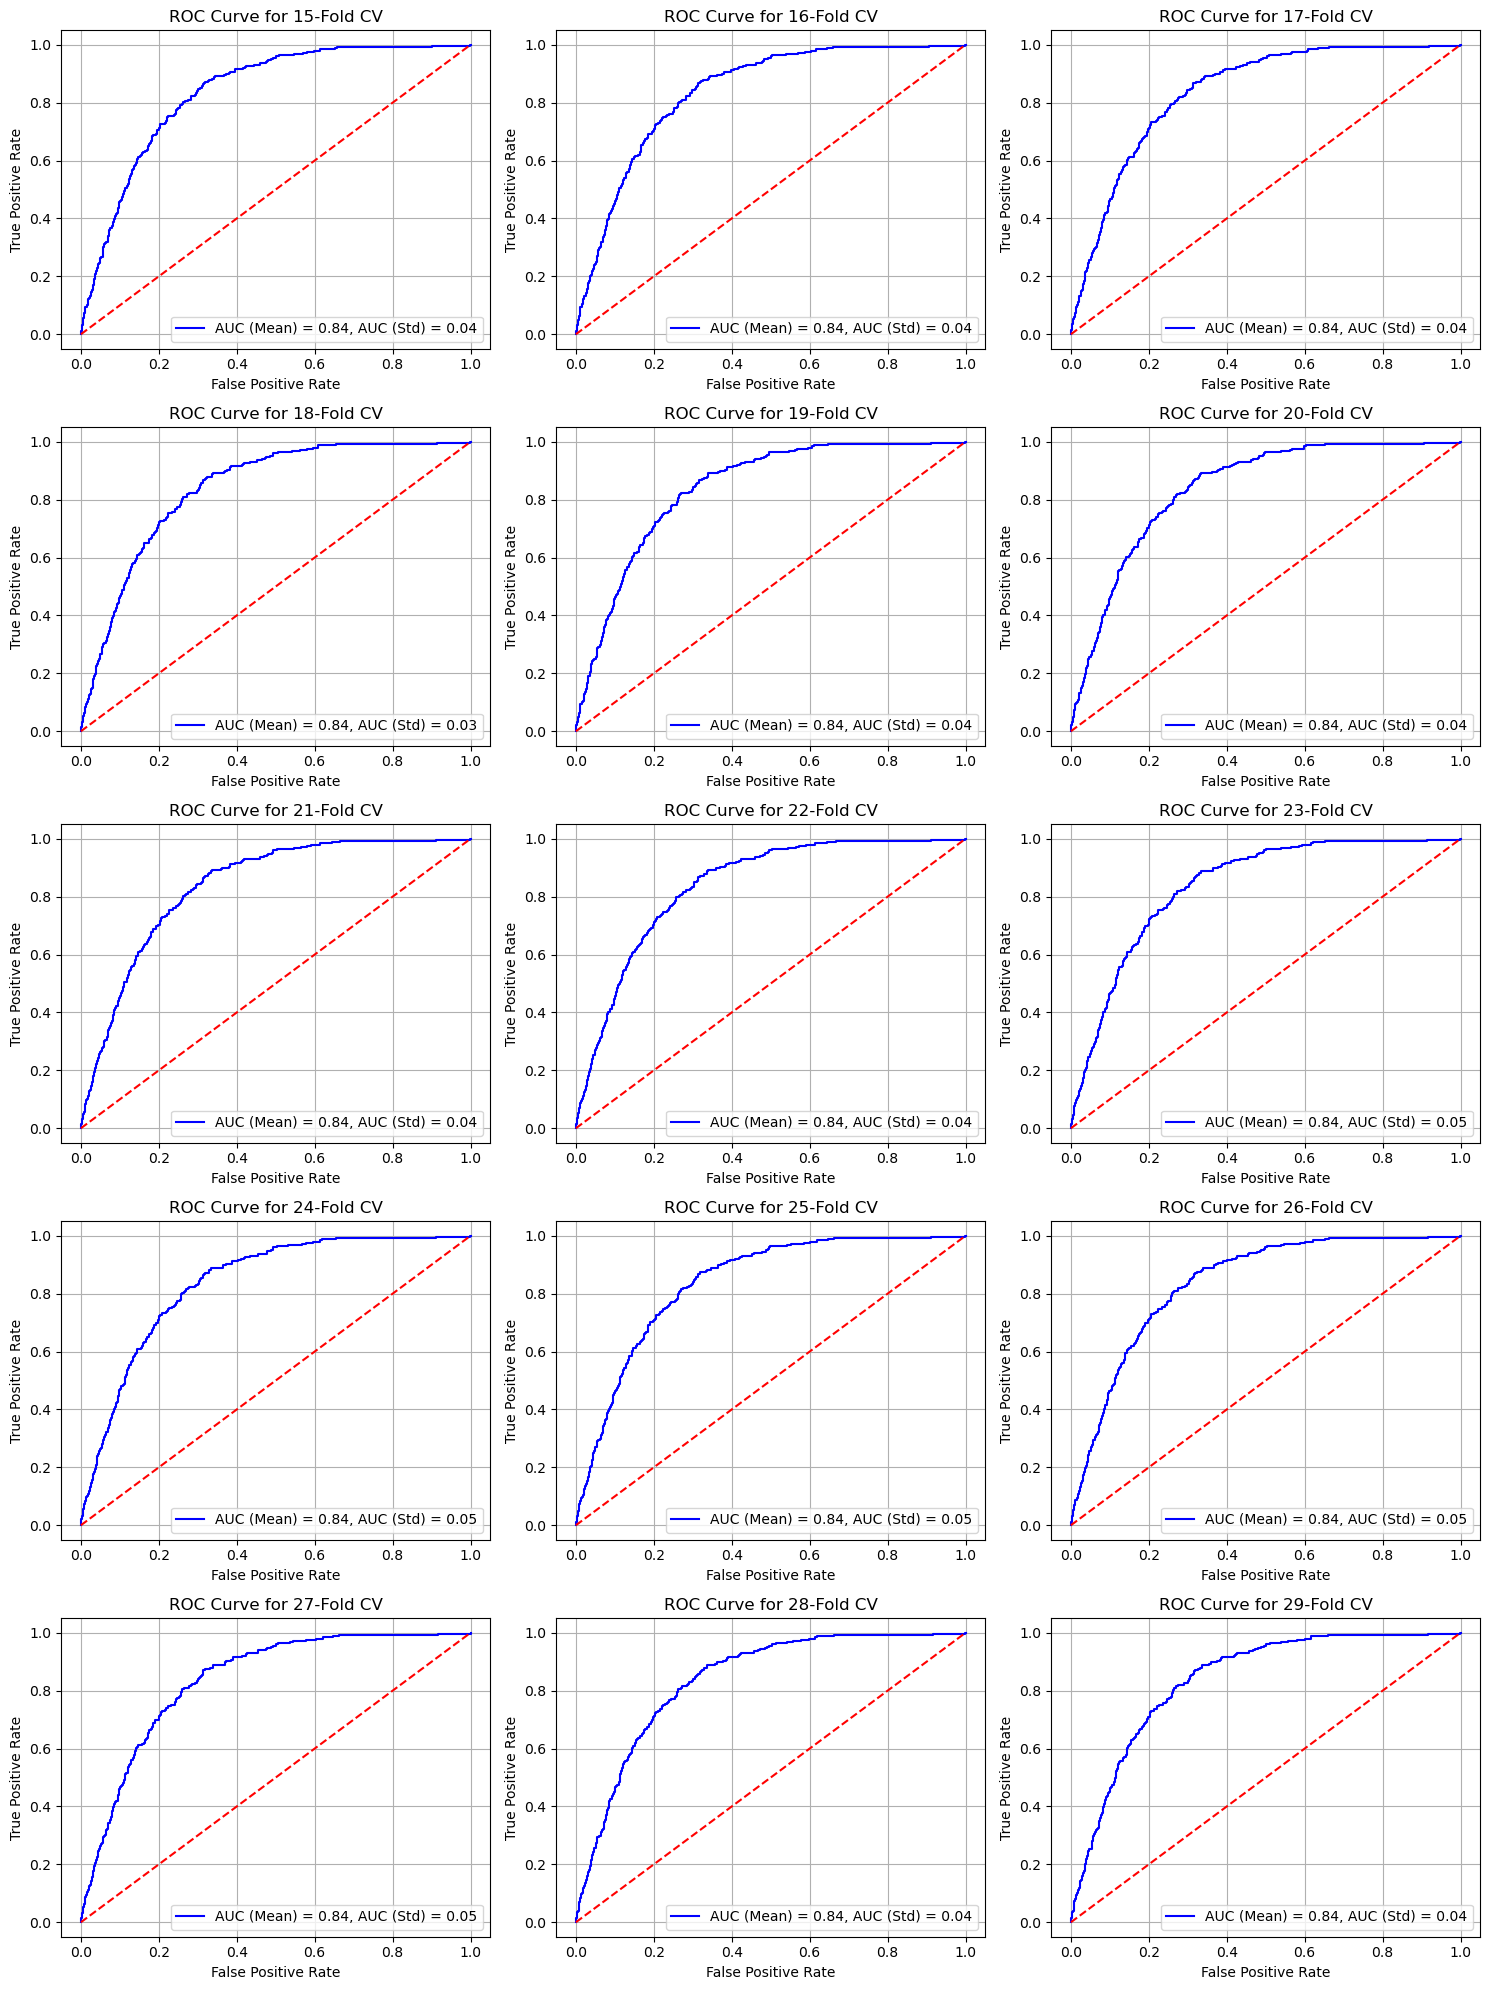

                                      accuracy_scores  average_accuracy   
0   [0.948948948948949, 0.9487951807228916, 0.9487...          0.950412  \
1   [0.9487179487179487, 0.9487179487179487, 0.948...          0.950413   
2   [0.9488054607508533, 0.9488054607508533, 0.948...          0.950412   
3   [0.9494584837545126, 0.9494584837545126, 0.949...          0.950413   
4   [0.9467680608365019, 0.9505703422053232, 0.950...          0.950412   
5   [0.948, 0.9477911646586346, 0.9477911646586346...          0.950412   
6   [0.9495798319327731, 0.9495798319327731, 0.949...          0.950412   
7   [0.947136563876652, 0.947136563876652, 0.94713...          0.950415   
8   [0.9493087557603687, 0.9493087557603687, 0.949...          0.950414   
9   [0.9471153846153846, 0.9471153846153846, 0.947...          0.950414   
10  [0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.9497487...          0.950412   
11  [0.9479166666666666, 0.9479166666666666, 0.947...          0.950417   
12  [0.9459459459459459, 

In [20]:
# here im scaling inside the training 
results = []
optimal_thresholds = []
# List of numerical features
num_features = ['age', 'avg_glucose_level', 'bmi']

# Create transformers and only scale the numerical features
transformers = [
    ('num', StandardScaler(), num_features)
]

# Use ColumnTransformer to apply the transformations
preprocessor = ColumnTransformer(transformers, remainder='passthrough')

# Create a pipeline with the preprocessor and logistic regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

n_splits_range = range(15, 30)
n_plots = len(n_splits_range)
n_cols = 3  # for 3 columns
n_rows = n_plots // n_cols + (n_plots % n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))

for idx, n_splits in enumerate(n_splits_range):
    stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    # Accuracy scores using the pipeline
    accuracy_scores = cross_val_score(pipeline, X_final, y, cv=stratified_kfold, scoring='accuracy')
    
    # Predict probabilities for ROC AUC for each fold using the pipeline
    y_prob = cross_val_predict(pipeline, X_final, y, cv=stratified_kfold, method="predict_proba")[:, 1]
    fold_auc_scores = [roc_auc_score(y[test_index], y_prob[test_index]) for train_index, test_index in stratified_kfold.split(X_final, y)]
    
    # Compute average and standard deviation of AUC scores
    mean_auc = np.mean(fold_auc_scores)
    std_auc = np.std(fold_auc_scores)
    
    # For the ROC curve
    fpr, tpr, thresholds = roc_curve(y, y_prob)
      # Calculate the optimal threshold for this n-split
    J = tpr - fpr
    optimal_idx = np.argmax(J)
    optimal_threshold = thresholds[optimal_idx]
    optimal_thresholds.append(optimal_threshold)
        # Store results
    results.append({
        'accuracy_scores': accuracy_scores,
        'average_accuracy': np.mean(accuracy_scores),
        'std_dev_accuracy': np.std(accuracy_scores),
        'roc_auc_mean': mean_auc,
        'roc_auc_stddev': std_auc,
        'n_splits': n_splits
    })

    ax = axes[idx // n_cols, idx % n_cols]
    ax.plot(fpr, tpr, color='blue', label=f'AUC (Mean) = {mean_auc:.2f}, AUC (Std) = {std_auc:.2f}')
    ax.plot([0, 1], [0, 1], color='red', linestyle='--')  # diagonal line
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve for {n_splits}-Fold CV')
    ax.legend(loc='lower right')
    ax.grid(True)

# If there are any remaining subplots, remove them
for j in range(idx + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

df = pd.DataFrame(results)
print(df)
best_threshold = np.mean(optimal_thresholds)  # For example, taking the average
print(f"Best Threshold: {best_threshold}")

In [31]:
num_features = ['age', 'avg_glucose_level', 'bmi']

# Create transformers and only scale the numerical features
transformers = [
    ('num', StandardScaler(), num_features)
]

# Use ColumnTransformer to apply the transformations
preprocessor = ColumnTransformer(transformers, remainder='passthrough')

# Create a pipeline with the preprocessor and logistic regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

pipeline.fit(X_final,y)

from sklearn.metrics import confusion_matrix

# Predict the probabilities
y_prob = pipeline.predict_proba(X_final)[:, 1]

# Apply the best threshold to classify predictions
y_pred = (y_prob > 0.03805271691878882).astype(int)

# Create the confusion matrix
cm = confusion_matrix(y, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[3194 1539]
 [  30  218]]


In [32]:
TN, FP, FN, TP = cm.ravel()

# Sensitivity or True Positive Rate
sensitivity = TP / (TP + FN)

# Specificity or True Negative Rate
specificity = TN / (TN + FP)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.8790322580645161
Specificity: 0.6748362560743715


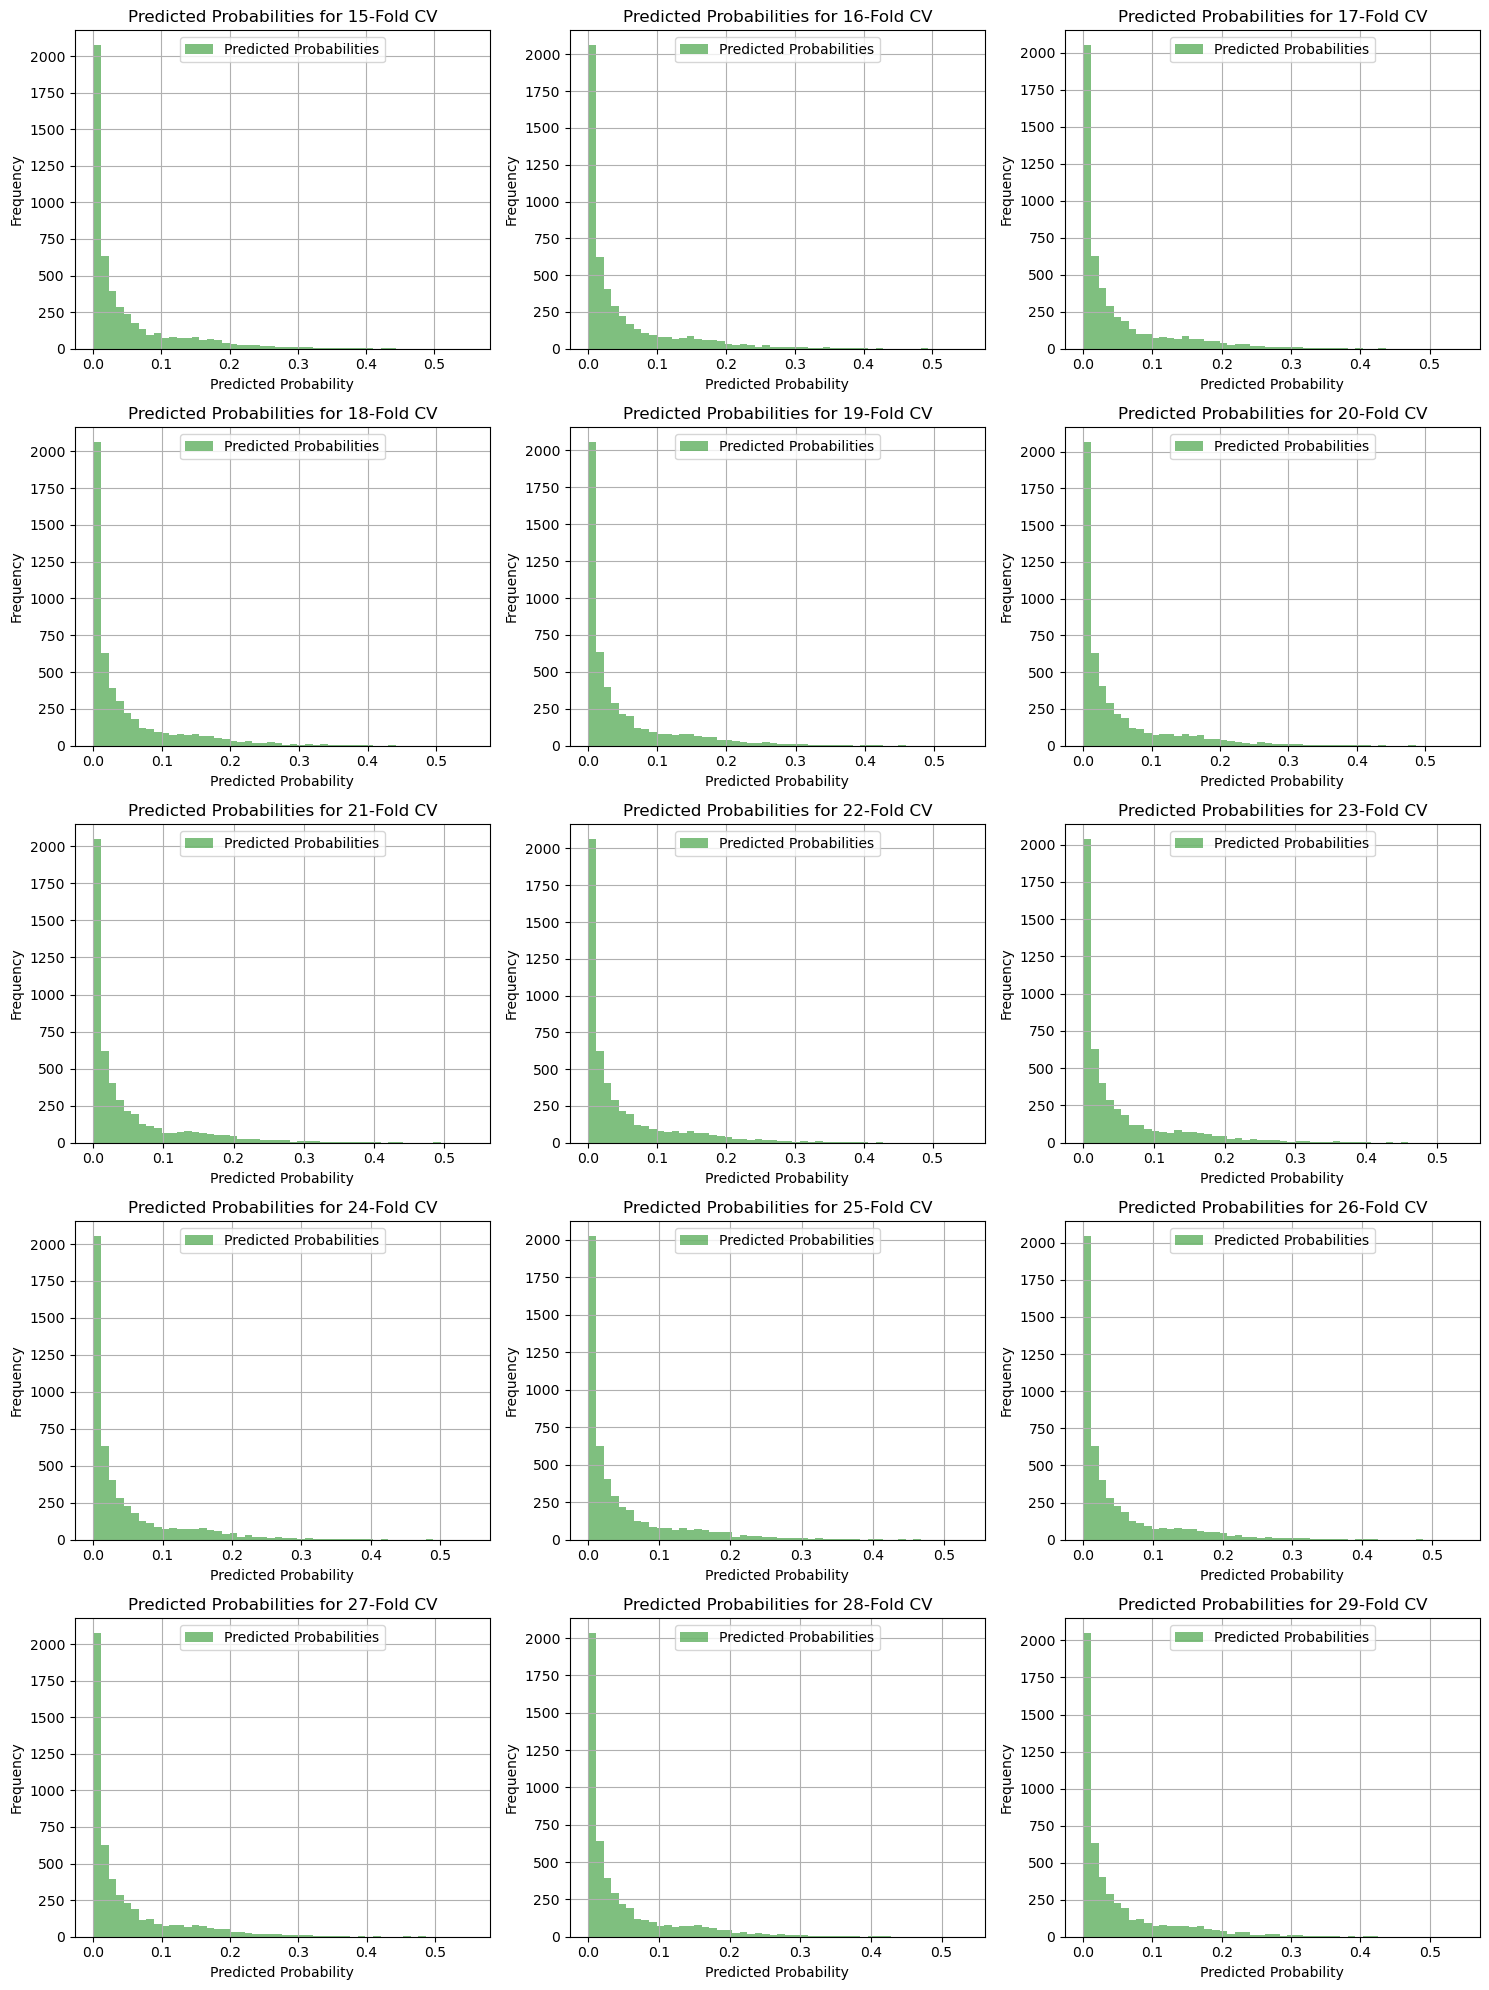

In [92]:
results = []

# List of numerical features
num_features = ['age', 'avg_glucose_level', 'bmi']

# Create transformers
transformers = [
    ('num', StandardScaler(), num_features)
]

# Use ColumnTransformer to apply the transformations
preprocessor = ColumnTransformer(transformers, remainder='passthrough')

# Create a pipeline with the preprocessor and logistic regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

n_splits_range = range(15, 30)
n_plots = len(n_splits_range)
n_cols = 3  # for 3 columns
n_rows = n_plots // n_cols + (n_plots % n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))

for idx, n_splits in enumerate(n_splits_range):
    stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    # Accuracy scores using the pipeline
    accuracy_scores = cross_val_score(pipeline, X_final, y, cv=stratified_kfold, scoring='accuracy')
    
    # Predict probabilities for ROC AUC for each fold using the pipeline
    y_prob = cross_val_predict(pipeline, X_final, y, cv=stratified_kfold, method="predict_proba")[:, 1]
    fold_auc_scores = [roc_auc_score(y[test_index], y_prob[test_index]) for train_index, test_index in stratified_kfold.split(X_final, y)]
    
    # Compute average and standard deviation of AUC scores
    mean_auc = np.mean(fold_auc_scores)
    std_auc = np.std(fold_auc_scores)
    
    # Store results
    results.append({
        'accuracy_scores': accuracy_scores,
        'average_accuracy': np.mean(accuracy_scores),
        'std_dev_accuracy': np.std(accuracy_scores),
        'roc_auc_mean': mean_auc,
        'roc_auc_stddev': std_auc,
        'n_splits': n_splits
    })

    ax = axes[idx // n_cols, idx % n_cols]
    
    # Plotting histogram for y_prob
    ax.hist(y_prob, bins=50, alpha=0.5, color='green', label='Predicted Probabilities')
    ax.set_xlabel('Predicted Probability')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Predicted Probabilities for {n_splits}-Fold CV')
    ax.legend(loc='upper center')
    ax.grid(True)

# If there are any remaining subplots, remove them
for j in range(idx + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


Support Vector Machine


Im going to try all the forms of SVM

In [91]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identifying numerical columns (replace this with your own logic if needed)
num_features = ['age', 'avg_glucose_level', 'bmi']

# Create the column transformer with StandardScaler for numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features)
    ],
    remainder='passthrough'  # non-numerical columns are passed through without transformation
)

# Create the final pipeline with preprocessor and LinearSVC
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LinearSVC(loss='hinge', max_iter=10000))
])

# Define the parameter grid
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# GridSearchCV with accuracy scoring
grid_search_acc = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search_acc.fit(X_final, y)
print(f"Best parameters (Accuracy): {grid_search_acc.best_params_}")
print(f"Best cross-validation score (Accuracy): {grid_search_acc.best_score_:.2f}")

# GridSearchCV with roc_auc scoring
grid_search_auc = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', verbose=1)
grid_search_auc.fit(X_final, y)
print(f"Best parameters (ROC AUC): {grid_search_auc.best_params_}")
print(f"Best cross-validation score (ROC AUC): {grid_search_auc.best_score_:.2f}")




Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters (Accuracy): {'classifier__C': 0.001}
Best cross-validation score (Accuracy): 0.95
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters (ROC AUC): {'classifier__C': 0.1}
Best cross-validation score (ROC AUC): 0.71


In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Identify numerical columns 
num_features = ['age', 'avg_glucose_level', 'bmi']

# Create the column transformer with StandardScaler for numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features)
    ],
    remainder='passthrough'  # non-numerical columns are passed through without transformation
)

# Create the final pipeline with preprocessor and SVC
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC())
])

# Define the parameter grid
param_grid = [
    {
        'classifier__kernel': ['poly'],
        'classifier__C': [0.1, 1, 10],
        'classifier__degree': [2, 3, 4],
        'classifier__coef0': [0, 1],
        'classifier__gamma': ['scale', 'auto', 0.01, 0.1, 1]
    },
    {
        'classifier__kernel': ['rbf'],
        'classifier__C': [0.1, 1, 10],
        'classifier__gamma': ['scale', 'auto', 0.01, 0.1, 1]
    }
]

# Initialize GridSearchCV with the pipeline, parameter grid, and the desired cross-validation strategy
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_final, y)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.2f}")





Fitting 5 folds for each of 105 candidates, totalling 525 fits
Best parameters: {'classifier__C': 1, 'classifier__coef0': 1, 'classifier__degree': 2, 'classifier__gamma': 'scale', 'classifier__kernel': 'poly'}
Best cross-validation score: 0.70


In [97]:
df_results = pd.DataFrame(grid_search.cv_results_)
df_results.to_csv('grid_search_results_SVM.tsv', sep='\t', index=False)

In [12]:
df_results = pd.DataFrame(grid_search.cv_results_)
df_results.to_csv('grid_search_results_SVM_auc.tsv', sep='\t', index=False)

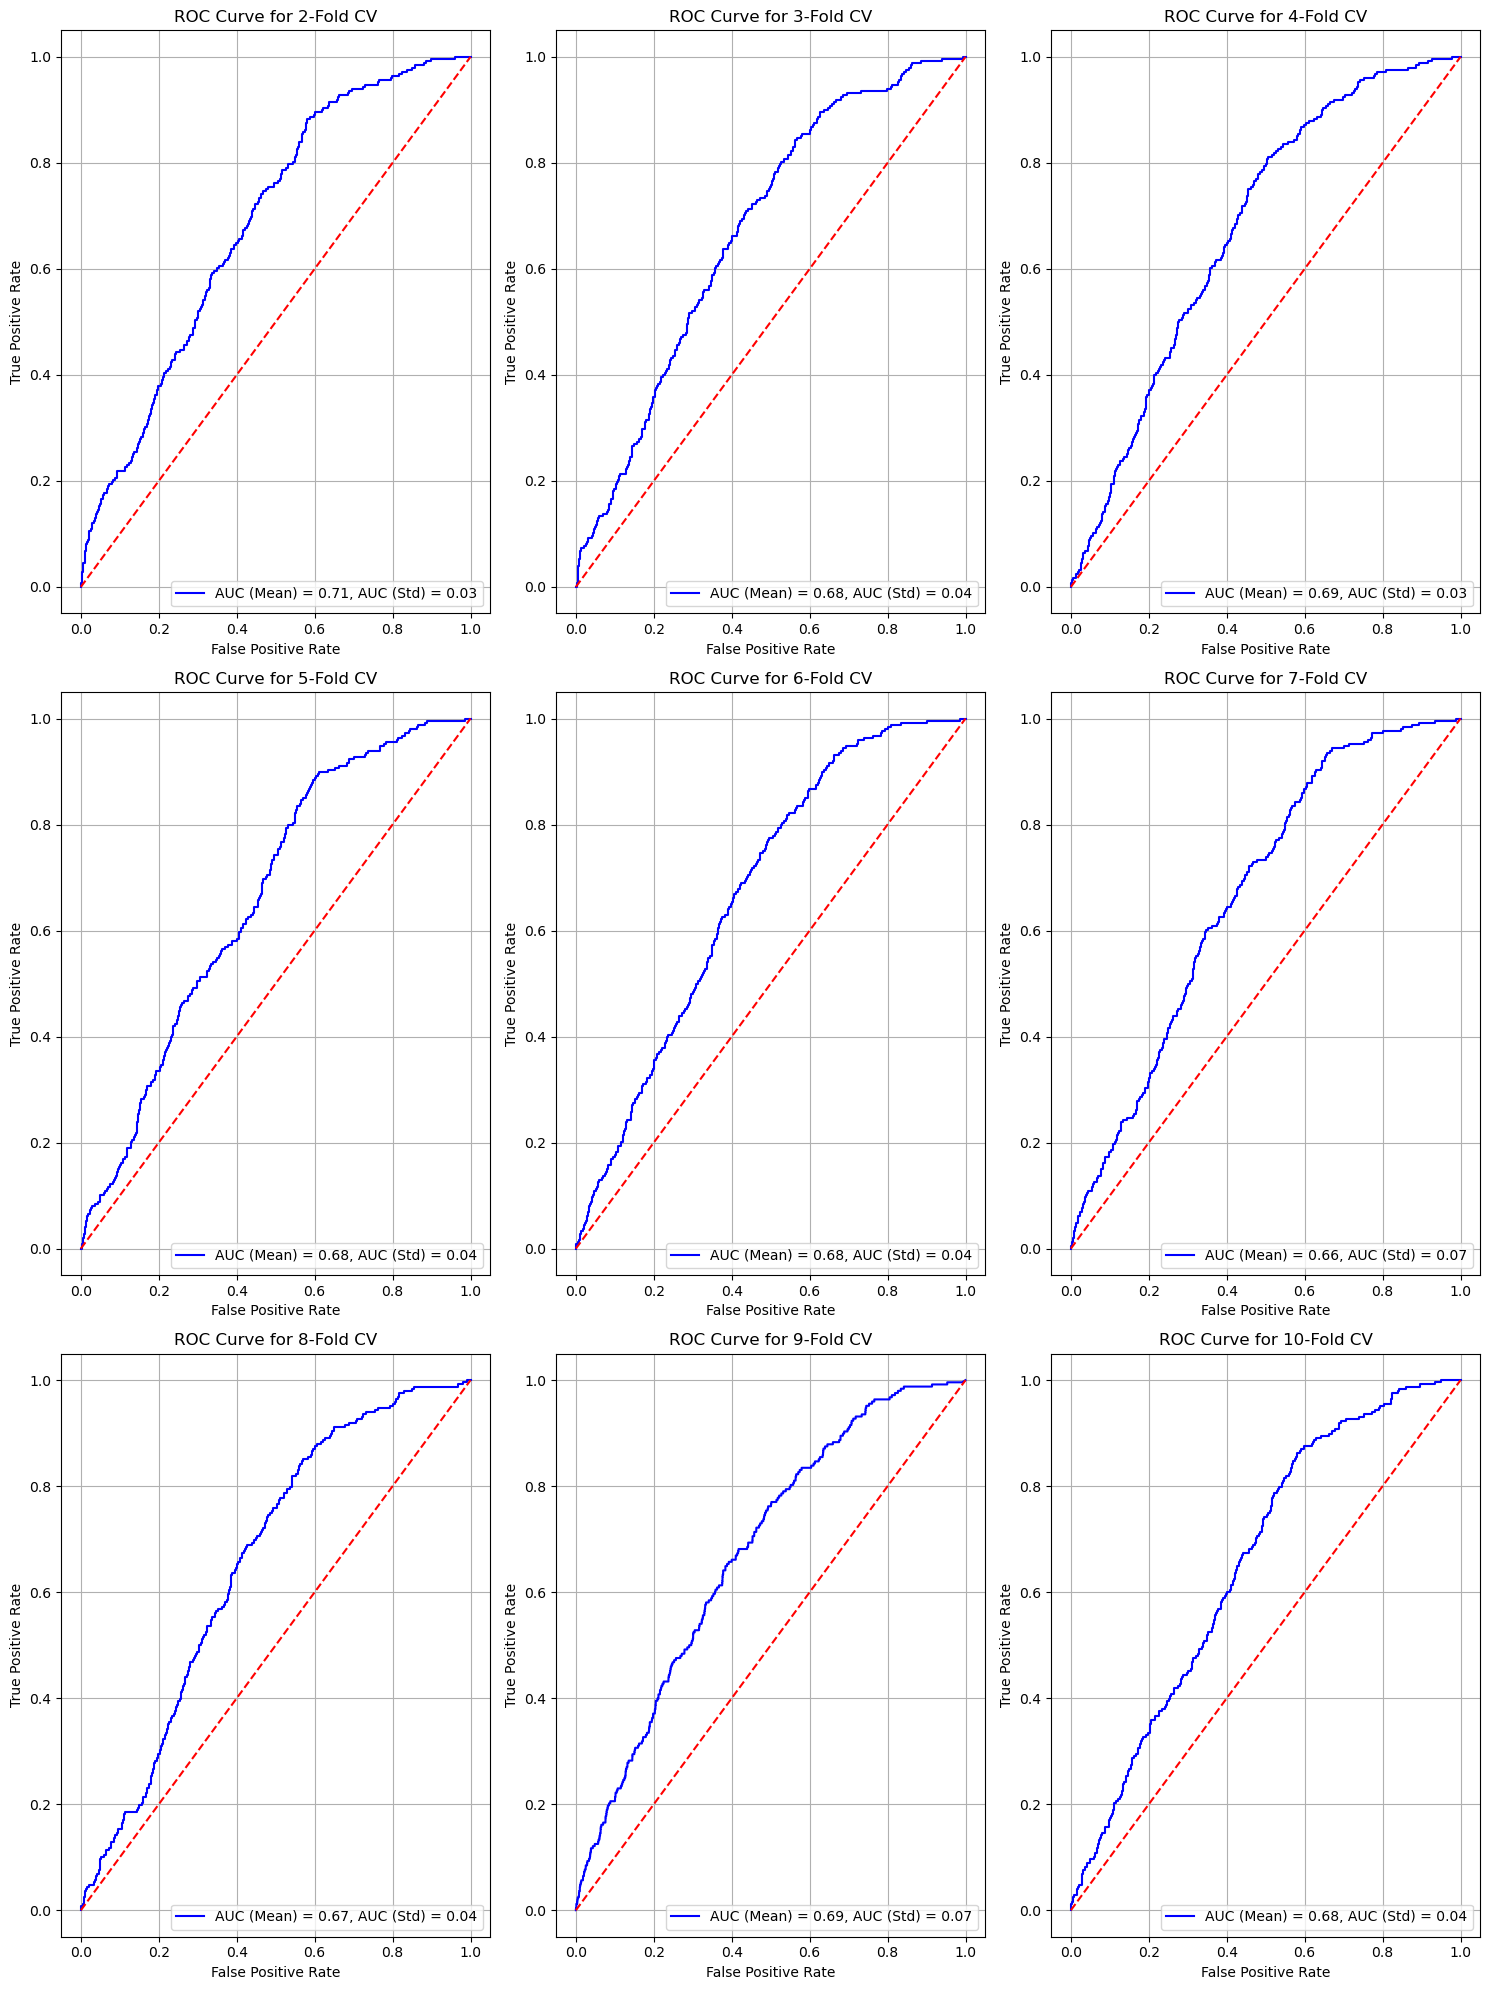

                                     accuracy_scores  average_accuracy   
0           [0.9502207948615013, 0.9502008032128514]          0.950211  \
1     [0.9500301023479831, 0.95, 0.9506024096385542]          0.950211   
2  [0.9502407704654896, 0.9502008032128514, 0.950...          0.950211   
3  [0.9498495486459378, 0.9497991967871486, 0.949...          0.950211   
4  [0.9494584837545126, 0.9493975903614458, 0.950...          0.950211   
5  [0.949438202247191, 0.949438202247191, 0.94943...          0.950211   
6  [0.9502407704654896, 0.9502407704654896, 0.950...          0.950211   
7  [0.9494584837545126, 0.9494584837545126, 0.949...          0.950211   
8  [0.9498997995991983, 0.9497991967871486, 0.949...          0.950211   

   std_dev_accuracy  roc_auc_mean  roc_auc_stddev  n_splits  
0          0.000010      0.705633        0.028320         2  
1          0.000277      0.683059        0.042085         3  
2          0.000017      0.693886        0.030696         4  
3          

In [13]:
results = []

# List of numerical features
num_features = ['age', 'avg_glucose_level', 'bmi']

# Create transformers and only scale the numerical features
transformers = [
    ('num', StandardScaler(), num_features)
]

# Use ColumnTransformer to apply the transformations
preprocessor = ColumnTransformer(transformers, remainder='passthrough')

# Create a pipeline with the preprocessor and SVM with polynomial kernel
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(
        C=1,
        coef0=1,
        degree=2,
        gamma='scale',
        kernel='poly',
        probability=True  # This needs to be set to True to use predict_proba
    ))
])

n_splits_range = range(2, 11)
n_plots = len(n_splits_range)
n_cols = 3  # for 3 columns
n_rows = n_plots // n_cols + (n_plots % n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))

for idx, n_splits in enumerate(n_splits_range):
    stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    # Accuracy scores using the pipeline
    accuracy_scores = cross_val_score(pipeline, X_final, y, cv=stratified_kfold, scoring='accuracy')
    
    # Predict probabilities for ROC AUC for each fold using the pipeline
    y_prob = cross_val_predict(pipeline, X_final, y, cv=stratified_kfold, method="predict_proba")[:, 1]
    fold_auc_scores = [roc_auc_score(y[test_index], y_prob[test_index]) for train_index, test_index in stratified_kfold.split(X_final, y)]
    
    # Compute average and standard deviation of AUC scores
    mean_auc = np.mean(fold_auc_scores)
    std_auc = np.std(fold_auc_scores)
    
    # For the ROC curve
    fpr, tpr, _ = roc_curve(y, y_prob)
        # Store results
    results.append({
        'accuracy_scores': accuracy_scores,
        'average_accuracy': np.mean(accuracy_scores),
        'std_dev_accuracy': np.std(accuracy_scores),
        'roc_auc_mean': mean_auc,
        'roc_auc_stddev': std_auc,
        'n_splits': n_splits
    })

    ax = axes[idx // n_cols, idx % n_cols]
    ax.plot(fpr, tpr, color='blue', label=f'AUC (Mean) = {mean_auc:.2f}, AUC (Std) = {std_auc:.2f}')
    ax.plot([0, 1], [0, 1], color='red', linestyle='--')  # diagonal line
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve for {n_splits}-Fold CV')
    ax.legend(loc='lower right')
    ax.grid(True)

# If there are any remaining subplots, remove them
for j in range(idx + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

df = pd.DataFrame(results)
print(df)

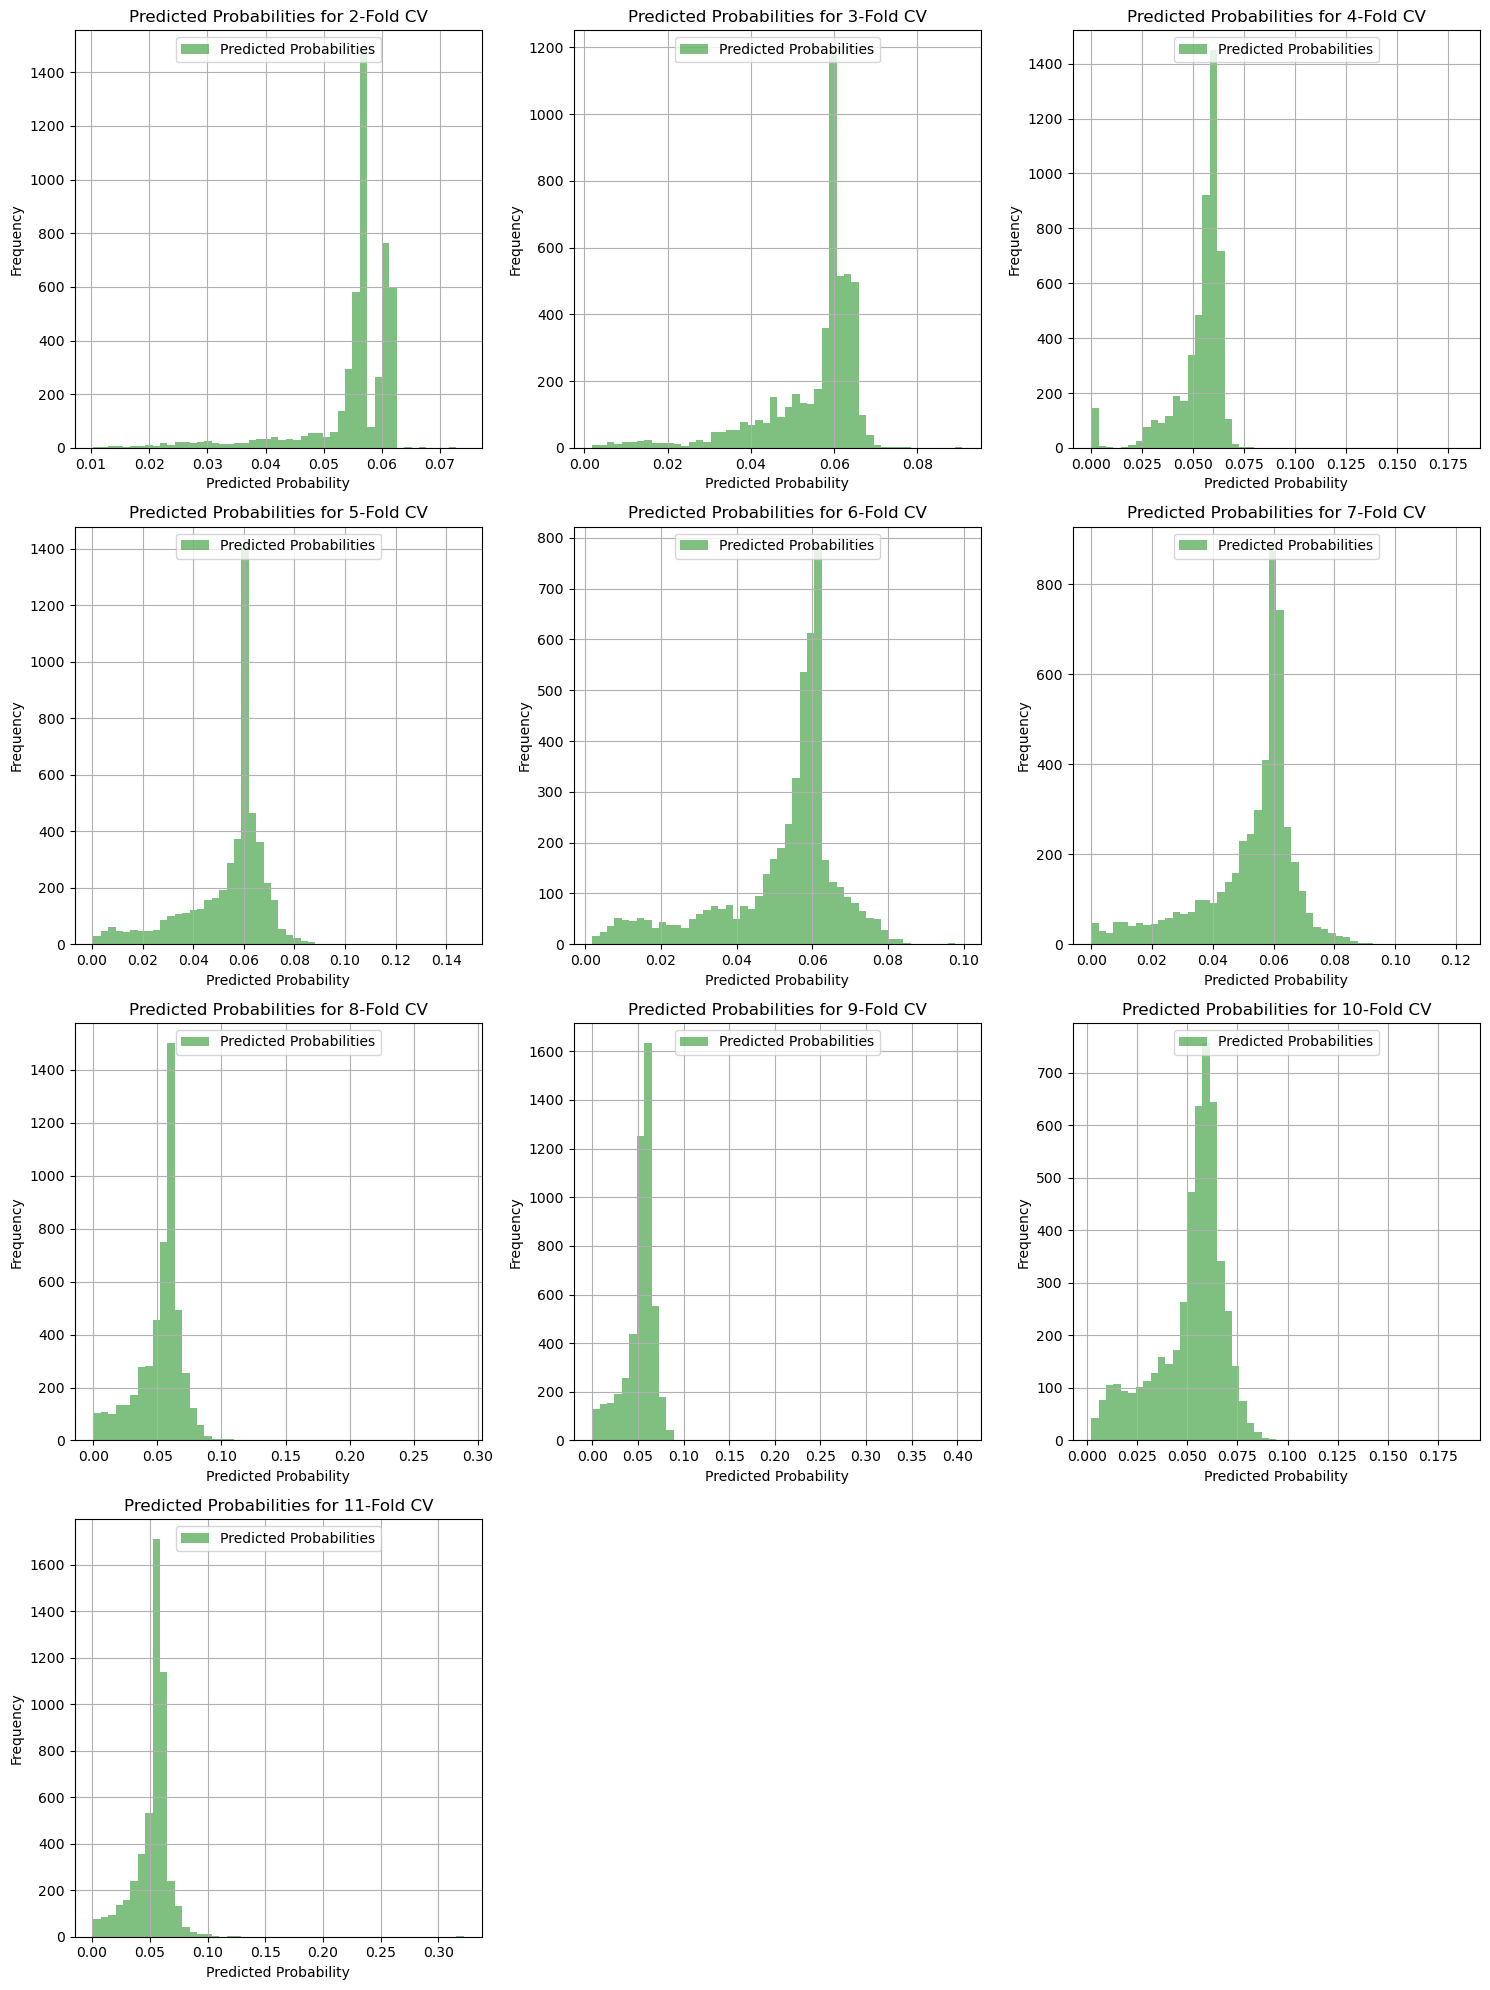

In [24]:
results = []

# List of numerical features
num_features = ['age', 'avg_glucose_level', 'bmi']

# Create transformers
transformers = [
    ('num', StandardScaler(), num_features)
]

# Use ColumnTransformer to apply the transformations
preprocessor = ColumnTransformer(transformers, remainder='passthrough')

# Create a pipeline with the preprocessor and logistic regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(
        C=1,
        coef0=1,
        degree=2,
        gamma='scale',
        kernel='poly',
        probability=True  # This needs to be set to True to use predict_proba
    ))
])

n_splits_range = range(2, 12)
n_plots = len(n_splits_range)
n_cols = 3  # for 3 columns
n_rows = n_plots // n_cols + (n_plots % n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))

for idx, n_splits in enumerate(n_splits_range):
    stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    # Accuracy scores using the pipeline
    accuracy_scores = cross_val_score(pipeline, X_final, y, cv=stratified_kfold, scoring='accuracy')
    
    # Predict probabilities for ROC AUC for each fold using the pipeline
    y_prob = cross_val_predict(pipeline, X_final, y, cv=stratified_kfold, method="predict_proba")[:, 1]
    fold_auc_scores = [roc_auc_score(y[test_index], y_prob[test_index]) for train_index, test_index in stratified_kfold.split(X_final, y)]
    
    # Compute average and standard deviation of AUC scores
    mean_auc = np.mean(fold_auc_scores)
    std_auc = np.std(fold_auc_scores)
    
    # Store results
    results.append({
        'accuracy_scores': accuracy_scores,
        'average_accuracy': np.mean(accuracy_scores),
        'std_dev_accuracy': np.std(accuracy_scores),
        'roc_auc_mean': mean_auc,
        'roc_auc_stddev': std_auc,
        'n_splits': n_splits
    })

    ax = axes[idx // n_cols, idx % n_cols]
    
    # Plotting histogram for y_prob
    ax.hist(y_prob, bins=50, alpha=0.5, color='green', label='Predicted Probabilities')
    ax.set_xlabel('Predicted Probability')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Predicted Probabilities for {n_splits}-Fold CV')
    ax.legend(loc='upper center')
    ax.grid(True)

# If there are any remaining subplots, remove them
for j in range(idx + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

Now Random Forest

In [14]:
X_final #Making sure everything is ok

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Male
0,67.0,0,1,1,228.69,36.6,True,False,False,True,True,False,False,True
1,80.0,0,1,1,105.92,32.5,True,False,False,False,False,True,False,True
2,49.0,0,0,1,171.23,34.4,True,False,False,True,False,False,True,False
3,79.0,1,0,1,174.12,24.0,False,True,False,False,False,True,False,False
4,81.0,0,0,1,186.21,29.0,True,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,41.0,0,0,0,70.15,29.8,True,False,False,False,True,False,False,True
4977,40.0,0,0,1,191.15,31.1,True,False,False,True,False,False,True,True
4978,45.0,1,0,1,95.02,31.8,False,False,False,False,False,False,True,False
4979,40.0,0,0,1,83.94,30.0,True,False,False,False,False,False,True,True


In [17]:


results = []

# List of numerical features
num_features = ['age', 'avg_glucose_level', 'bmi']

# Create transformers and only scale the numerical features
transformers = [
    ('num', StandardScaler(), num_features)
]
preprocessor = ColumnTransformer(transformers, remainder='passthrough')

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('randomforestclassifier', RandomForestClassifier(random_state=42))
])

# Define the parameter grid
param_grid = {
    'randomforestclassifier__n_estimators': [50, 100, 200, 300],
    'randomforestclassifier__max_depth': [None, 10, 20, 30],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4, 6],
    'randomforestclassifier__bootstrap': [True, False]
}

scoring = {
    'AUC': 'roc_auc',
    'Accuracy': 'accuracy'
}

# Initialize GridSearchCV with the pipeline, parameter grid, multiple scoring metrics, and the desired cross-validation strategy
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=scoring, refit='AUC', verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_final, y)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best AUC score: {grid_search.cv_results_['mean_test_AUC'][grid_search.best_index_]:.2f}")
print(f"Accuracy for best AUC score: {grid_search.cv_results_['mean_test_Accuracy'][grid_search.best_index_]:.2f}")


Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Best parameters: {'randomforestclassifier__bootstrap': True, 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_samples_leaf': 6, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 200}
Best AUC score: 0.82
Accuracy for best AUC score: 0.95


In [22]:
# Convert the results to a Pandas DataFrame
df_results = pd.DataFrame(grid_search.cv_results_)

# Filter out columns we're interested in (optional, but makes the result more readable)
selected_columns = ['params', 'mean_test_AUC', 'std_test_AUC', 'mean_test_Accuracy', 'std_test_Accuracy', 'rank_test_AUC']
df_results = df_results[selected_columns]

# Save the results to a TSV file
df_results.to_csv('grid_search_results_RF.tsv', sep='\t', index=False)


In [19]:
df_results

,params,mean_test_AUC,std_test_AUC,mean_test_Accuracy,std_test_Accuracy,rank_test_AUC
0,"{'randomforestclassifier__bootstrap': True, 'r...",0.775296,0.019614,0.948203,0.001507,379
1,"{'randomforestclassifier__bootstrap': True, 'r...",0.779901,0.019622,0.948805,0.000021,373
2,"{'randomforestclassifier__bootstrap': True, 'r...",0.795771,0.018322,0.949006,0.000735,331
3,"{'randomforestclassifier__bootstrap': True, 'r...",0.795821,0.020213,0.948605,0.000964,329
4,"{'randomforestclassifier__bootstrap': True, 'r...",0.788657,0.023099,0.949006,0.001169,359
...,...,...,...,...,...,...
379,"{'randomforestclassifier__bootstrap': False, '...",0.815557,0.018992,0.950211,0.000484,94
380,"{'randomforestclassifier__bootstrap': False, '...",0.807231,0.022169,0.950211,0.000484,235
381,"{'randomforestclassifier__bootstrap': False, '...",0.811968,0.017400,0.950211,0.000484,153
382,"{'randomforestclassifier__bootstrap': False, '...",0.814275,0.017421,0.950211,0.000484,123


In [20]:
# Adjust display settings
pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', None)  # Adjust display width
pd.set_option('display.max_colwidth', None)  # Display full column content

print(df_results)


                                                                                                                                                                                                                                   params   
0       {'randomforestclassifier__bootstrap': True, 'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 50}  \
1      {'randomforestclassifier__bootstrap': True, 'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 100}   
2      {'randomforestclassifier__bootstrap': True, 'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 200}   
3      {'randomforestclassifier__bootstrap': True, '

In [ ]:
df_results = pd.DataFrame(grid_search.cv_results_)
df_results.to_csv('grid_search_results_RandomForest.tsv', sep='\t', index=False)

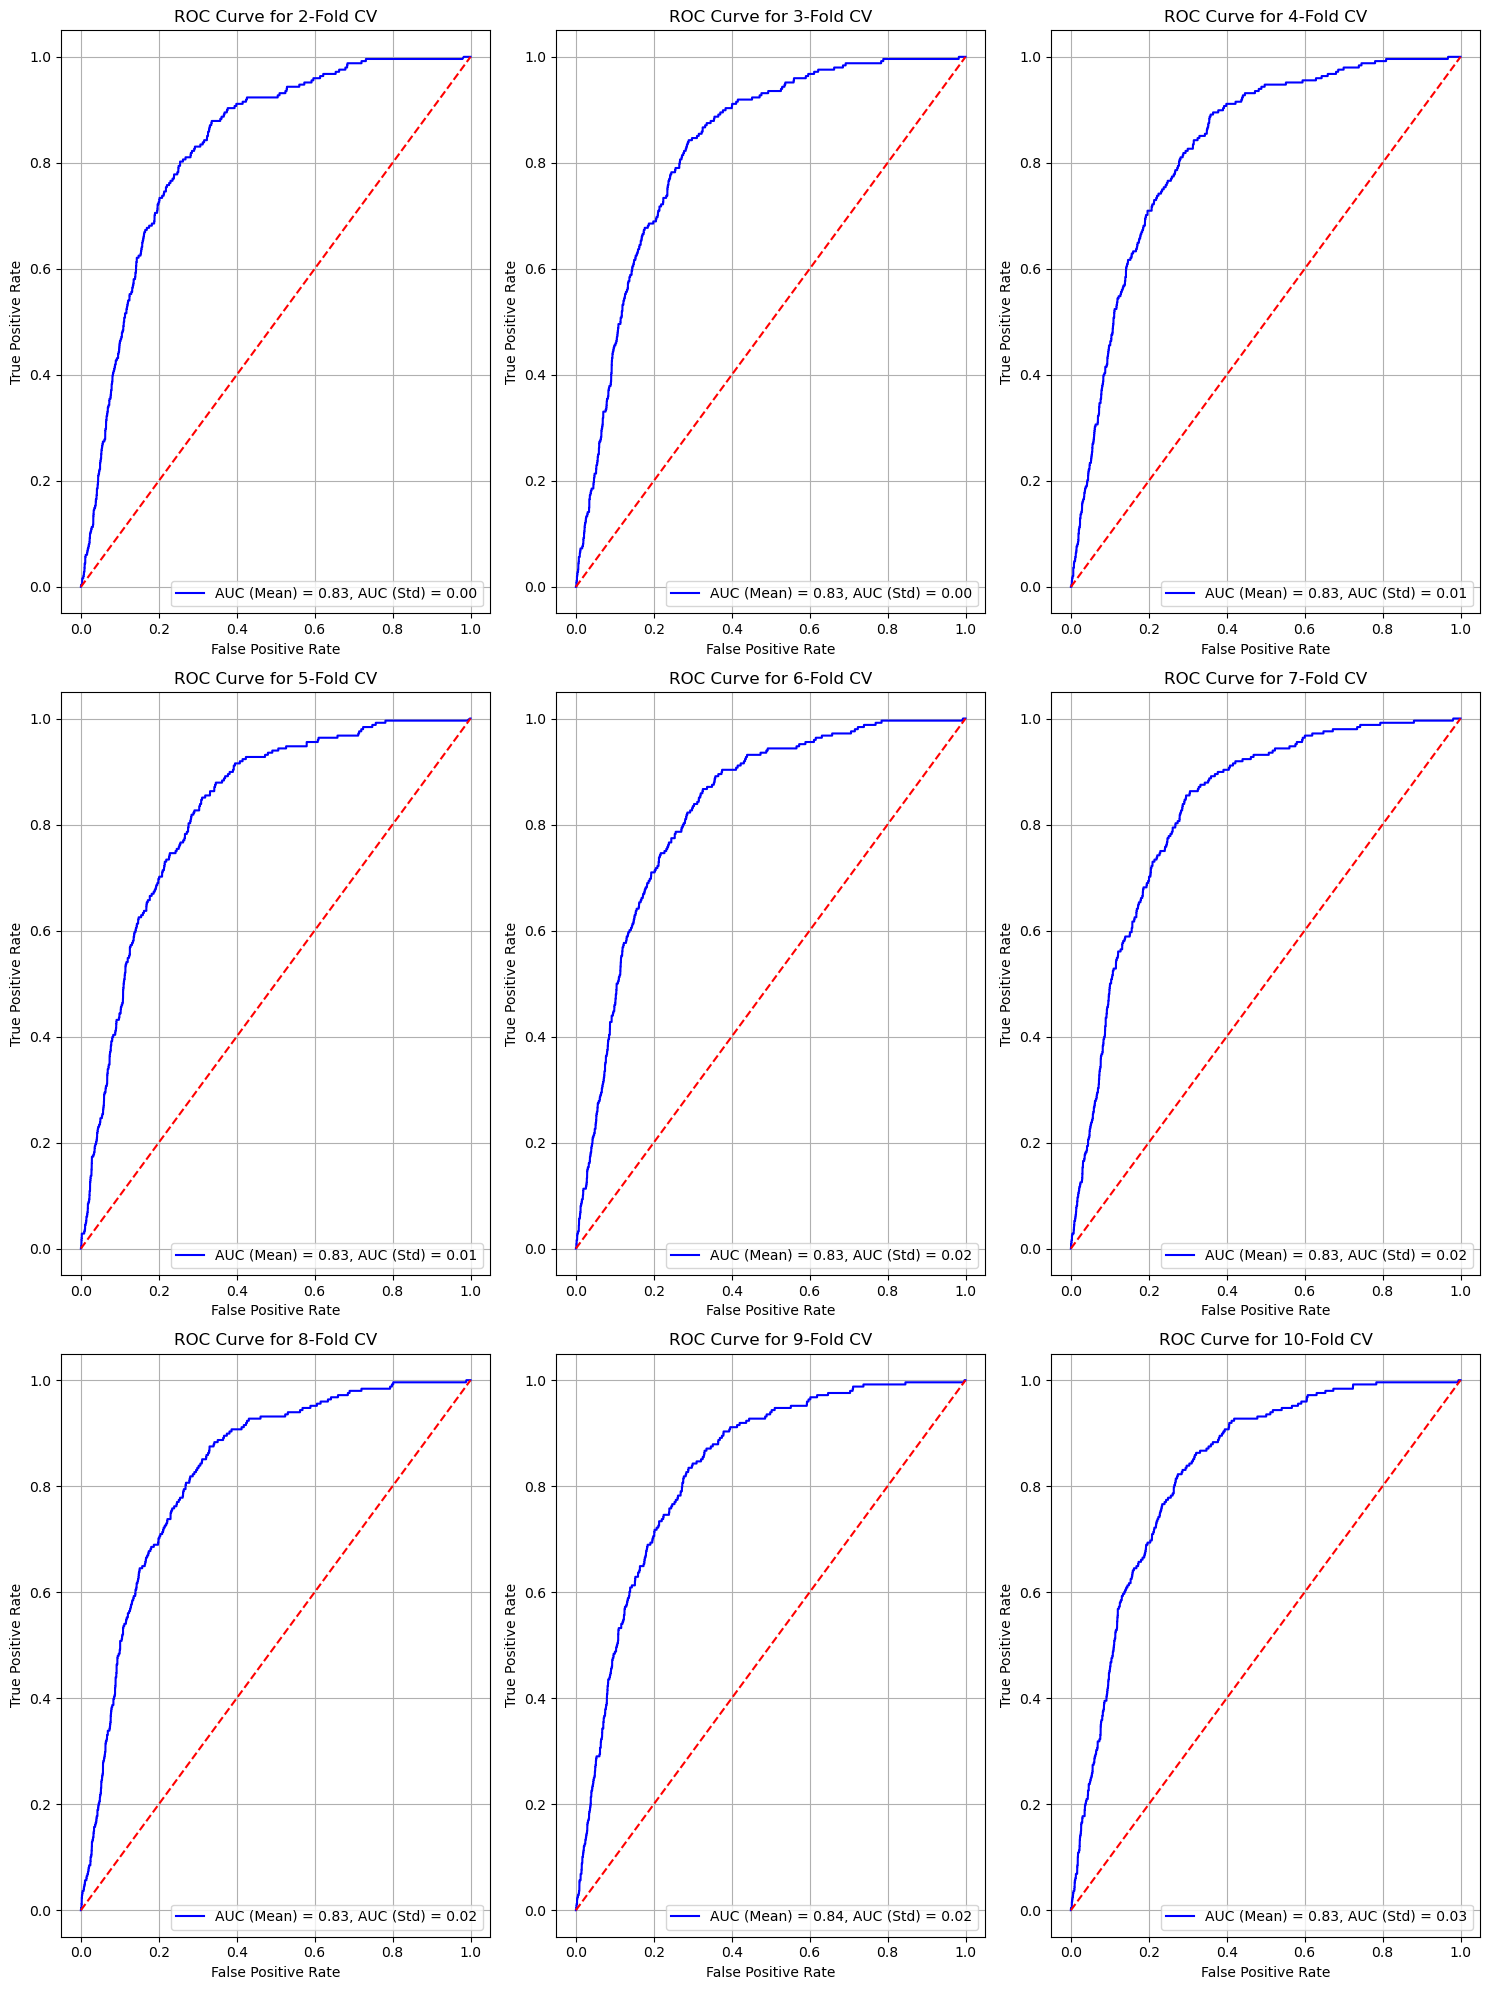

                                                                                                                                                                                            accuracy_scores   
0                                                                                                                                                                  [0.9502207948615013, 0.9502008032128514]  \
1                                                                                                                                                            [0.9500301023479831, 0.95, 0.9506024096385542]   
2                                                                                                                          [0.9502407704654896, 0.9502008032128514, 0.9502008032128514, 0.9502008032128514]   
3                                                                                                      [0.9498495486459378, 0.9497991967871486, 0.9497991967871486, 0.950803

In [25]:
results = []

# List of numerical features
num_features = ['age', 'avg_glucose_level', 'bmi']

# Create transformers and only scale the numerical features
transformers = [
    ('num', StandardScaler(), num_features)
]

# Use ColumnTransformer to apply the transformations
preprocessor = ColumnTransformer(transformers, remainder='passthrough')

# Create a pipeline with the preprocessor and the best Random Forest model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        bootstrap=True,
        max_depth=10,
        min_samples_leaf=6,
        min_samples_split=2,
        n_estimators=200,
        random_state=42
    ))
])

n_splits_range = range(2, 11)
n_plots = len(n_splits_range)
n_cols = 3  # for 3 columns
n_rows = n_plots // n_cols + (n_plots % n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))

for idx, n_splits in enumerate(n_splits_range):
    stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    # Accuracy scores using the pipeline
    accuracy_scores = cross_val_score(pipeline, X_final, y, cv=stratified_kfold, scoring='accuracy')
    
    # Predict probabilities for ROC AUC for each fold using the pipeline
    y_prob = cross_val_predict(pipeline, X_final, y, cv=stratified_kfold, method="predict_proba")[:, 1]
    fold_auc_scores = [roc_auc_score(y[test_index], y_prob[test_index]) for train_index, test_index in stratified_kfold.split(X_final, y)]
    
    # Compute average and standard deviation of AUC scores
    mean_auc = np.mean(fold_auc_scores)
    std_auc = np.std(fold_auc_scores)
    
    # For the ROC curve
    fpr, tpr, _ = roc_curve(y, y_prob)
    
    # Store results
    results.append({
        'accuracy_scores': accuracy_scores,
        'average_accuracy': np.mean(accuracy_scores),
        'std_dev_accuracy': np.std(accuracy_scores),
        'roc_auc_mean': mean_auc,
        'roc_auc_stddev': std_auc,
        'n_splits': n_splits
    })

    ax = axes[idx // n_cols, idx % n_cols]
    ax.plot(fpr, tpr, color='blue', label=f'AUC (Mean) = {mean_auc:.2f}, AUC (Std) = {std_auc:.2f}')
    ax.plot([0, 1], [0, 1], color='red', linestyle='--')  # diagonal line
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve for {n_splits}-Fold CV')
    ax.legend(loc='lower right')
    ax.grid(True)

# If there are any remaining subplots, remove them
for j in range(idx + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

df = pd.DataFrame(results)
print(df)




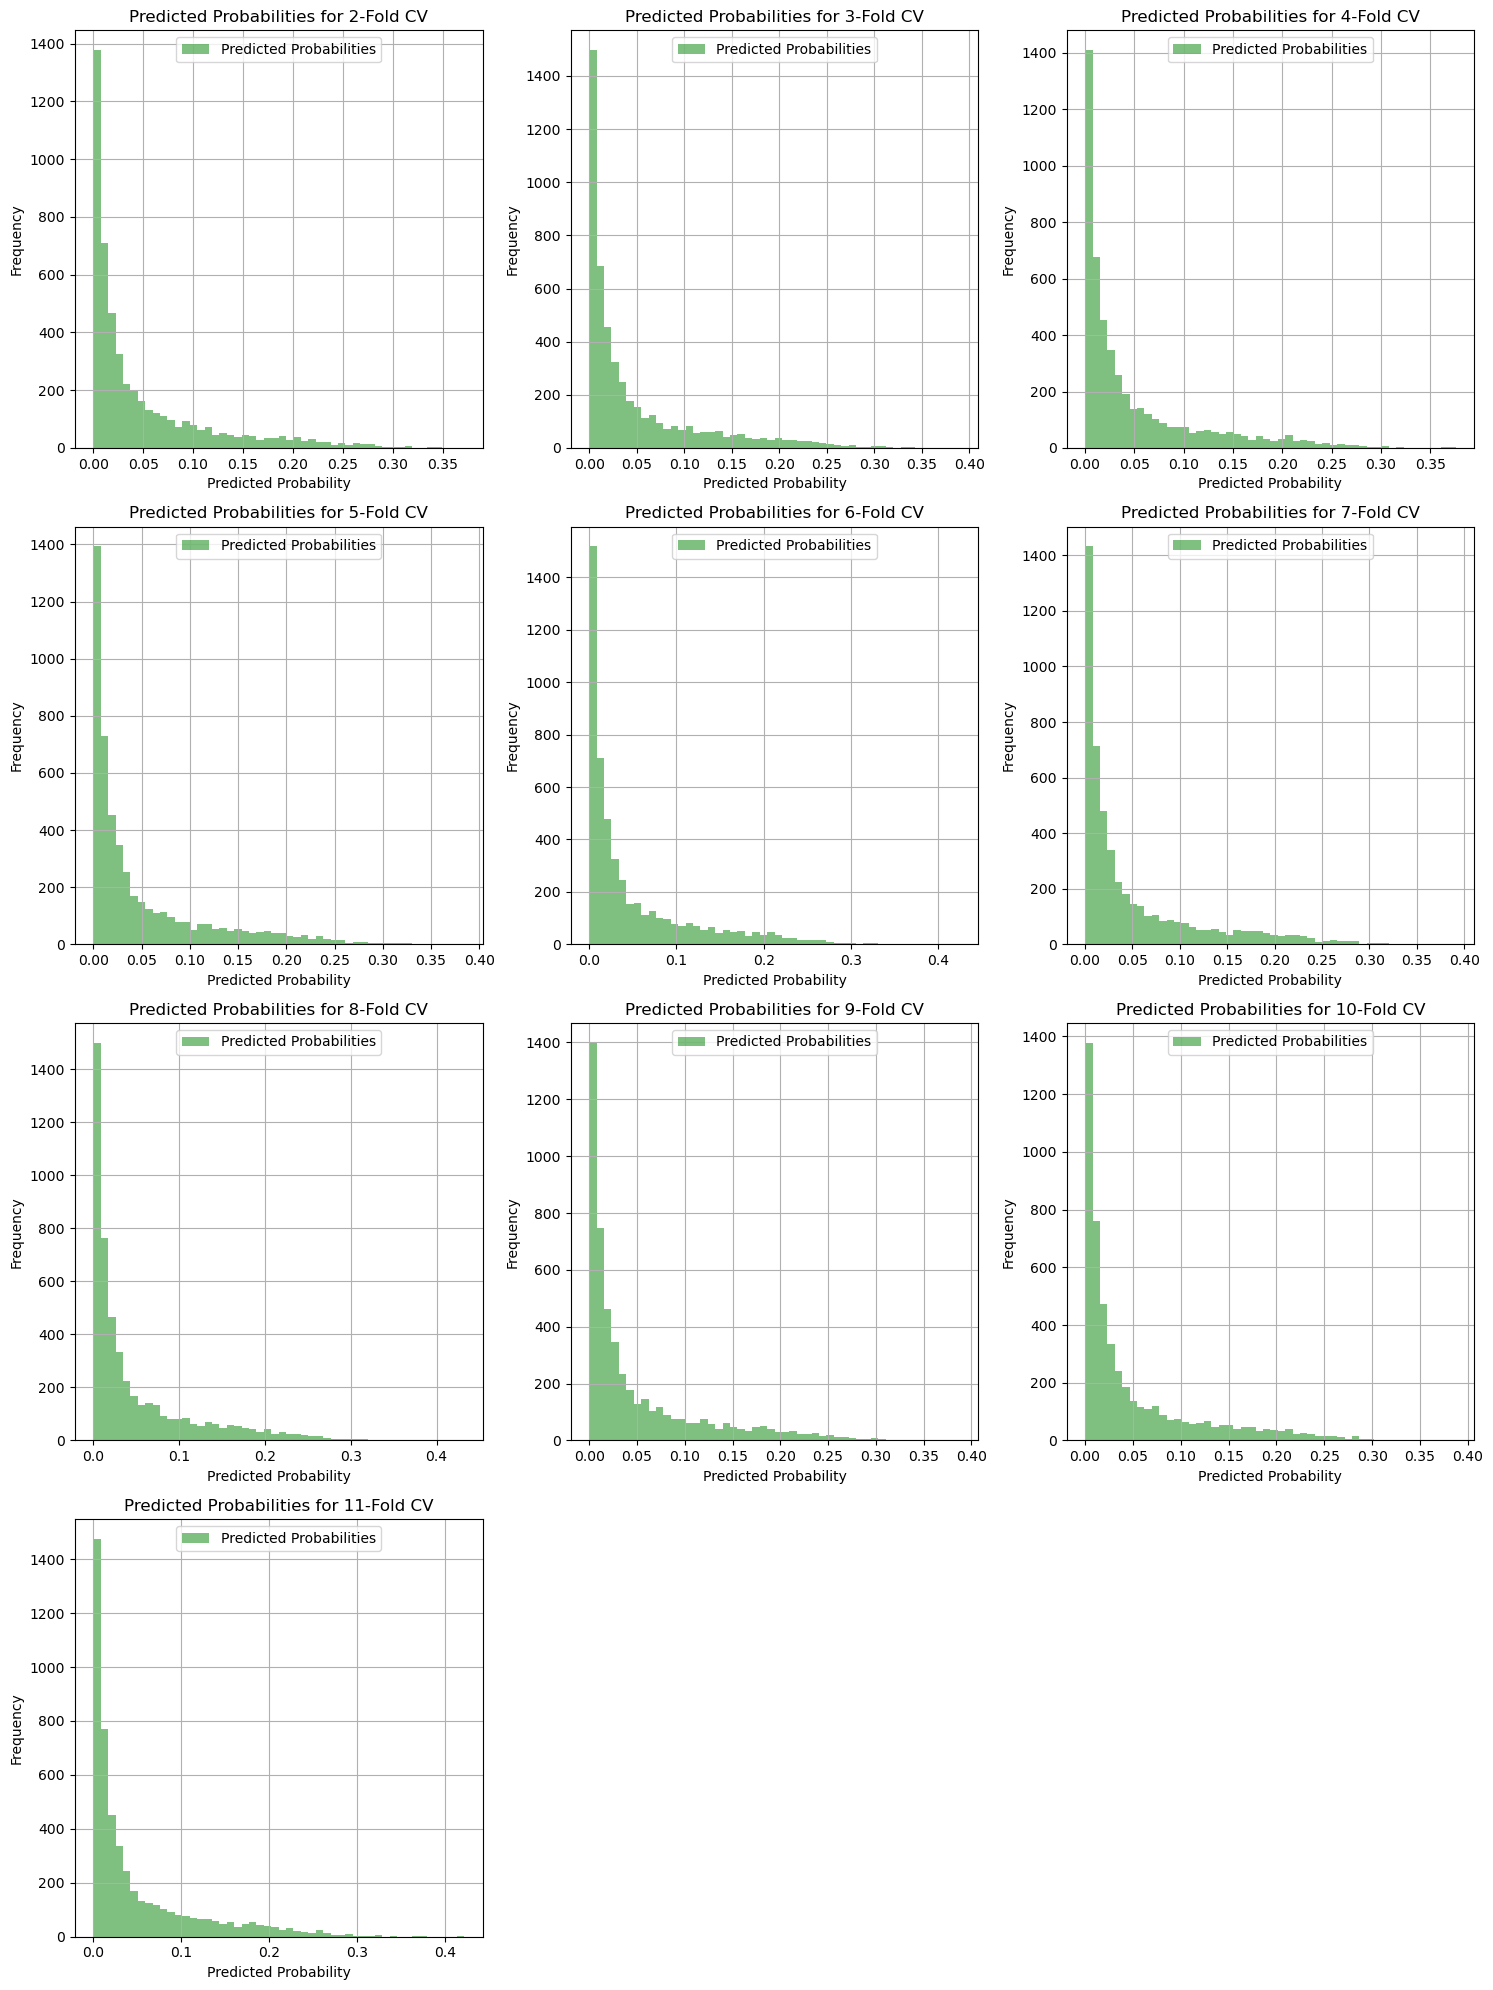

In [26]:
results = []

# List of numerical features
num_features = ['age', 'avg_glucose_level', 'bmi']

# Create transformers and only scale the numerical features
transformers = [
    ('num', StandardScaler(), num_features)
]

# Use ColumnTransformer to apply the transformations
preprocessor = ColumnTransformer(transformers, remainder='passthrough')

# Create a pipeline with the preprocessor and the best Random Forest model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        bootstrap=True,
        max_depth=10,
        min_samples_leaf=6,
        min_samples_split=2,
        n_estimators=200,
        random_state=42
    ))
])

n_splits_range = range(2, 12)
n_plots = len(n_splits_range)
n_cols = 3  # for 3 columns
n_rows = n_plots // n_cols + (n_plots % n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))

for idx, n_splits in enumerate(n_splits_range):
    stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    # Accuracy scores using the pipeline
    accuracy_scores = cross_val_score(pipeline, X_final, y, cv=stratified_kfold, scoring='accuracy')
    
    # Predict probabilities for ROC AUC for each fold using the pipeline
    y_prob = cross_val_predict(pipeline, X_final, y, cv=stratified_kfold, method="predict_proba")[:, 1]
    fold_auc_scores = [roc_auc_score(y[test_index], y_prob[test_index]) for train_index, test_index in stratified_kfold.split(X_final, y)]
    
    # Compute average and standard deviation of AUC scores
    mean_auc = np.mean(fold_auc_scores)
    std_auc = np.std(fold_auc_scores)
    
    # Store results
    results.append({
        'accuracy_scores': accuracy_scores,
        'average_accuracy': np.mean(accuracy_scores),
        'std_dev_accuracy': np.std(accuracy_scores),
        'roc_auc_mean': mean_auc,
        'roc_auc_stddev': std_auc,
        'n_splits': n_splits
    })

    ax = axes[idx // n_cols, idx % n_cols]
    
    # Plotting histogram for y_prob
    ax.hist(y_prob, bins=50, alpha=0.5, color='green', label='Predicted Probabilities')
    ax.set_xlabel('Predicted Probability')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Predicted Probabilities for {n_splits}-Fold CV')
    ax.legend(loc='upper center')
    ax.grid(True)

# If there are any remaining subplots, remove them
for j in range(idx + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


In [ ]:
# Evaluation and choosing the Random Forest
results = []

# List of numerical features
num_features = ['age', 'avg_glucose_level', 'bmi']

# Create transformers and only scale the numerical features
transformers = [('num', StandardScaler(), num_features)]

# Use ColumnTransformer to apply the transformations
preprocessor = ColumnTransformer(transformers, remainder='passthrough')

# Create a pipeline with the preprocessor and the best Random Forest model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        bootstrap=True,
        max_depth=10,
        min_samples_leaf=6,
        min_samples_split=2,
        n_estimators=200,
        random_state=42
    ))
])

n_splits_range = range(2, 11)
n_plots = len(n_splits_range)
n_cols = 3  # for 3 columns
n_rows = n_plots // n_cols + (n_plots % n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))

for idx, n_splits in enumerate(n_splits_range):
    stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    # Accuracy scores using the pipeline
    accuracy_scores = cross_val_score(pipeline, X_final, y, cv=stratified_kfold, scoring='accuracy')
    
    # Predict probabilities for ROC AUC for each fold using the pipeline
    y_prob = cross_val_predict(pipeline, X_final, y, cv=stratified_kfold, method="predict_proba")[:, 1]
    fold_auc_scores = [roc_auc_score(y[test_index], y_prob[test_index]) for train_index, test_index in stratified_kfold.split(X_final, y)]
    
    # Compute average and standard deviation of AUC scores
    mean_auc = np.mean(fold_auc_scores)
    std_auc = np.std(fold_auc_scores)
    
    # For the ROC curve
    fpr, tpr, thresholds = roc_curve(y, y_prob)
    
    # Calculate the distance to the top-left corner for each threshold
    distances = np.sqrt((1 - tpr) ** 2 + fpr ** 2)
    best_idx = np.argmin(distances)
    best_threshold = thresholds[best_idx]
    
    # Store results
    results.append({
        'accuracy_scores': accuracy_scores,
        'average_accuracy': np.mean(accuracy_scores),
        'std_dev_accuracy': np.std(accuracy_scores),
        'roc_auc_mean': mean_auc,
        'roc_auc_stddev': std_auc,
        'best_threshold': best_threshold,
        'n_splits': n_splits
    })
    

In [ ]:
#determine the best threshold
df = pd.DataFrame(results)
print(df)

In [30]:
mean_best_threshold = df['best_threshold'].mean()
print(mean_best_threshold)

0.054481824638243706


In [27]:
from sklearn.metrics import confusion_matrix
num_features = ['age', 'avg_glucose_level', 'bmi']

# Create transformers and only scale the numerical features
transformers = [('num', StandardScaler(), num_features)]

# Use ColumnTransformer to apply the transformations
preprocessor = ColumnTransformer(transformers, remainder='passthrough')

# Create a pipeline with the preprocessor and the best Random Forest model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        bootstrap=True,
        max_depth=10,
        min_samples_leaf=6,
        min_samples_split=2,
        n_estimators=200,
        random_state=42
    ))
])


pipeline.fit(X_final, y)


y_prob = pipeline.predict_proba(X_final)[:, 1]

threshold = 0.05
y_pred = (y_prob > threshold).astype(int)


cm = confusion_matrix(y, y_pred)
print(cm)

[[3497 1236]
 [   4  244]]


In [28]:
TN, FP, FN, TP = cm.ravel()

# Sensitivity or True Positive Rate
sensitivity = TP / (TP + FN)

# Specificity or True Negative Rate
specificity = TN / (TN + FP)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.9838709677419355
Specificity: 0.7388548489330234


In [ ]:
#[[True Negative   False Positive]
# [False Negative   True Positive]]

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
#SVM evaluation
num_features = ['age', 'avg_glucose_level', 'bmi']

# Create transformers
transformers = [
    ('num', StandardScaler(), num_features)
]

# Use ColumnTransformer to apply the transformations
preprocessor = ColumnTransformer(transformers, remainder='passthrough')

# Create a pipeline with the preprocessor and logistic regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(
        C=1,
        coef0=1,
        degree=2,
        gamma='scale',
        kernel='poly',
        probability=True  # This needs to be set to True to use predict_proba
    ))
])

pipeline.fit(X_final, y)

y_pred = pipeline.predict(X_final)  # Assuming X_test is your test set features


cm = confusion_matrix(y, y_pred)  # Assuming y_test is your test set true labels

print(cm)

[[4733    0]
 [ 248    0]]


In [30]:
TN, FP, FN, TP = cm.ravel()

# Sensitivity or True Positive Rate
sensitivity = TP / (TP + FN)

# Specificity or True Negative Rate
specificity = TN / (TN + FP)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

Sensitivity: 0.0
Specificity: 1.0


In [10]:
from sklearn.metrics import confusion_matrix
num_features = ['age', 'avg_glucose_level', 'bmi']

# Create the column transformer with StandardScaler for numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features)
    ],
    remainder='passthrough'  # non-numerical columns are passed through without transformation
)

# Create the final pipeline with preprocessor and LinearSVC
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LinearSVC(loss='hinge',C = 0.1, max_iter=10000))
])

pipeline.fit(X_final, y)

y_pred = pipeline.predict(X_final)  # Assuming X_test is your test set features


cm = confusion_matrix(y, y_pred)  # Assuming y_test is your test set true labels

print(cm)

[[4733    0]
 [ 248    0]]
